<a href="https://colab.research.google.com/gist/vinotharjun/37c06cfaa2772e26ad7c8ad84705efe6/face-grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary import

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# cd /content/drive/My Drive/keras-facenet

/content/drive/My Drive/keras-facenet


In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from sklearn.cluster import DBSCAN
import os
from sklearn.preprocessing import scale
from tqdm import tqdm
filename="/content/drive/My Drive/face grouping/Data/18f44a7a3fad9366cc97a00476fdf54a.jpeg"

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/keras-facenet/model/facenet_keras.h5')

Using TensorFlow backend.














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Testing Cell

In [0]:

#load image
filename="/content/drive/My Drive/face grouping/Data/18f44a7a3fad9366cc97a00476fdf54a.jpeg"
image = Image.open(filename)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)

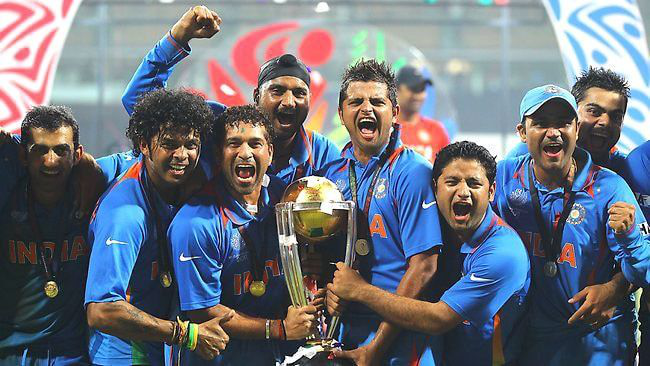

In [0]:
image

In [0]:

 # create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)
str(len(results)) +" faces"

'9 faces'

In [0]:
results

[{'box': [438, 159, 50, 66],
  'confidence': 1.0,
  'keypoints': {'left_eye': (450, 182),
   'mouth_left': (452, 209),
   'mouth_right': (472, 209),
   'nose': (463, 194),
   'right_eye': (474, 183)}},
 {'box': [223, 119, 44, 66],
  'confidence': 0.9999995231628418,
  'keypoints': {'left_eye': (233, 142),
   'mouth_left': (234, 167),
   'mouth_right': (254, 167),
   'nose': (245, 155),
   'right_eye': (254, 143)}},
 {'box': [345, 80, 45, 63],
  'confidence': 0.9999415874481201,
  'keypoints': {'left_eye': (355, 102),
   'mouth_left': (357, 124),
   'mouth_right': (375, 125),
   'nose': (366, 109),
   'right_eye': (377, 102)}},
 {'box': [152, 123, 45, 59],
  'confidence': 0.9999352693557739,
  'keypoints': {'left_eye': (169, 144),
   'mouth_left': (167, 166),
   'mouth_right': (187, 167),
   'nose': (182, 156),
   'right_eye': (190, 145)}},
 {'box': [578, 89, 44, 59],
  'confidence': 0.9999340772628784,
  'keypoints': {'left_eye': (594, 111),
   'mouth_left': (592, 132),
   'mouth_right

In [0]:
# extract the bounding box from the first face
x1, y1, width, height = results[1]['box']

x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
face = pixels[y1:y2, x1:x2]


In [0]:
face.shape

(41, 0, 3)

In [0]:
# face net model shape (x,160,60)
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = np.asarray(image)


In [0]:
face_array.shape

(160, 160, 3)

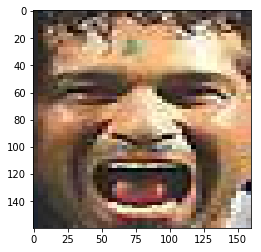

In [0]:
import matplotlib.pyplot as plt
plt.imshow(face_array)

# face extraction and visualization

## extract all faces from one photograph

In [0]:
def extract_faces(filename, required_size=(160, 160)):
    faces=[]
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    if len(results)==0:
        return faces
    for i in range(len(results)):
        x1, y1, width, height = results[i]['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize(required_size)
        faces.append(np.asarray(image))
    return faces



In [0]:
all_faces_single_pic=extract_faces(filename)

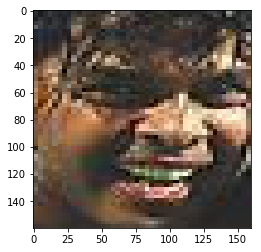

In [0]:
plt.imshow(all_faces_single_pic[3])

## show one face per photograph

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)


IndexError: ignored

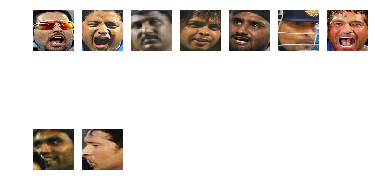

In [0]:
#code
def extract_face(filename, required_size=(160, 160)):
	image = Image.open(filename)
	image = image.convert('RGB')
	pixels = np.asarray(image)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = np.asarray(image)
	return face_array
folder = '/content/drive/My Drive/face grouping/Data/'
i = 1
for filename in os.listdir(folder):

	path = folder + filename
	face = extract_face(path)
	print(i, face.shape)
	plt.subplot(2, 7, i)
	plt.axis('off')
	plt.imshow(face)
	i += 1
plt.show()

## Show all faces from all photographs

In [0]:
def show_all_faces(all_faces):
  i=0
  _ ,fig = plt.subplots(1, len(all_faces), figsize=(12,12))
  if len(all_faces)==1:
      plt.imshow(all_faces[0])
      return ""
  else:
      fig = fig.flatten()
      for f in fig:
        f.imshow(all_faces[i])
        i=i+1
       


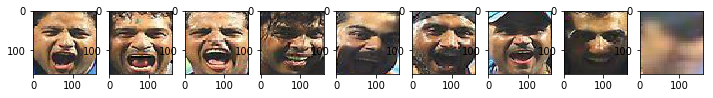

In [0]:
show_all_faces(all_faces_single_pic)

2 /content/drive/My Drive/face grouping/Data/c.jpg
9 /content/drive/My Drive/face grouping/Data/18f44a7a3fad9366cc97a00476fdf54a.jpeg
12 /content/drive/My Drive/face grouping/Data/gettyimages-136152775-2048x2048.jpg
14 /content/drive/My Drive/face grouping/Data/gettyimages-136152720-2048x2048.jpg
10 /content/drive/My Drive/face grouping/Data/gettyimages-111437105-2048x2048.jpg
2 /content/drive/My Drive/face grouping/Data/gettyimages-110022776-2048x2048.jpg
7 /content/drive/My Drive/face grouping/Data/cr.jpg
5 /content/drive/My Drive/face grouping/Data/gettyimages-109045999-2048x2048.jpg
1 /content/drive/My Drive/face grouping/Data/sachin.jpg
0 /content/drive/My Drive/face grouping/Data/pexels-photo-414612.jpeg


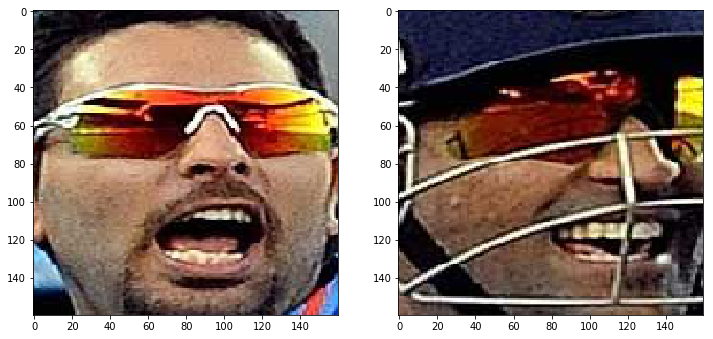

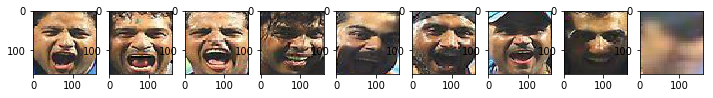

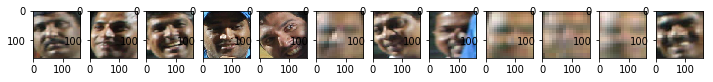

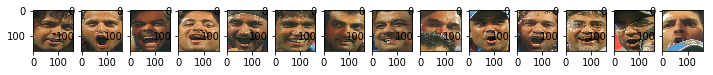

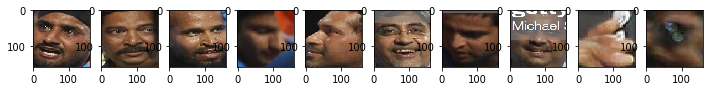

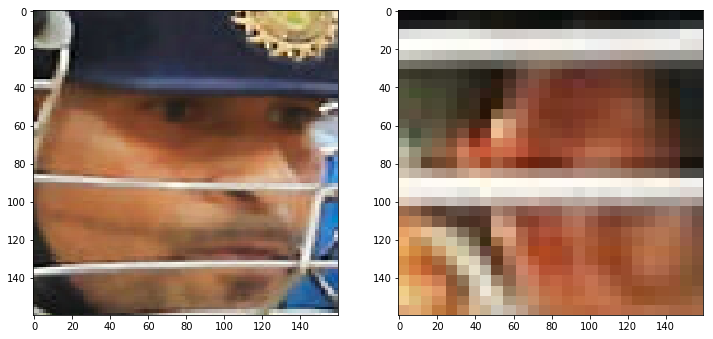

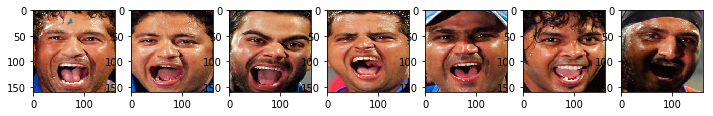

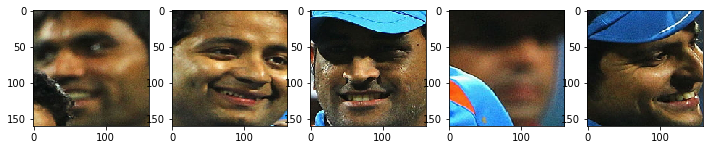

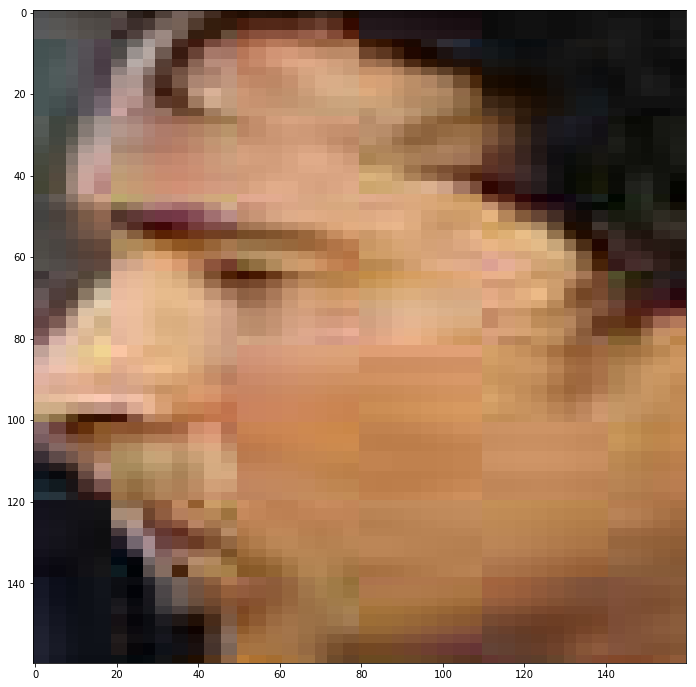

<Figure size 864x864 with 0 Axes>

In [0]:
#extact all faces  from all photograph
# specify folder to plot
folder = '/content/drive/My Drive/face grouping/Data/'
# enumerate files
for filename in os.listdir(folder):
    path = folder + filename
    faces = extract_faces(path)
    print(len(faces),path)
    show_all_faces(faces)
plt.show()

## Making load dataset callable


In [0]:

def load_data(folder):
    all_faces=[]
    for filename in os.listdir(folder):
        path = folder+"/" + filename
        faces = extract_faces(path)
        print(len(faces))
        all_faces.append({"id":path,"face_list":faces})
    return all_faces
  

In [0]:
import time
time1=time.time()
all_faces = load_data("/content/drive/My Drive/face grouping/Data")
time2=time.time()
print(str(time2-time1))



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

9
2
5
7
2
10
14
12
1
0
45.0247118473053


# Facial embeddin using FaceNet

In [0]:
model = load_model('/content/drive/My Drive/keras-facenet/model/facenet_keras.h5')


Loaded Model


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [0]:

face_pixels=all_faces[0]["face_list"][1]
face_pixels = face_pixels.astype('float32')
mean, std = face_pixels.mean(), face_pixels.std()
face_pixels = (face_pixels - mean) / std

samples = np.expand_dims(face_pixels, axis=0)

In [0]:
samples.shape

(1, 160, 160, 3)

In [0]:

yhat = model.predict(samples)
embedding = yhat[0]

In [0]:
yhat.shape

(1, 128)

# get embeddings with all face in all photographs

In [0]:

def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(axis=(1,2),keepdims=True),face_pixels.std(axis=(0,1),keepdims=True)
    face_pixels = (face_pixels - mean) / std
    yhat = model.predict(face_pixels)
    return yhat

In [0]:
def load_data(folder):
    all_faces=[]
    for filename in tqdm(os.listdir(folder)):
        path = folder+"/" + filename
#         print("reading....",path)
        faces = extract_faces(path)
        if len(faces)>0:
          y_hat=get_embedding(model,np.asarray(faces))
        else:
          y_hat= []
        all_faces.append({"id":path,"face_list":faces,"face_embeddings":y_hat,"count":len(faces)})
    return all_faces
  

In [0]:
all_faces=load_data("/content/drive/My Drive/face grouping/data")


100%|██████████| 6/6 [00:11<00:00,  1.97s/it]


# Grouping photos using facial similarity approach

In [0]:
def get_l2_distance(encoding1, encoding2):
  return np.linalg.norm(encoding2-encoding1)/100

In [0]:
from numpy import dot
from numpy.linalg import norm

def get_cosine_distance(a,b):
  return dot(a, b)/(norm(a)*norm(b))

In [0]:
group_list=[]
for image in all_faces:
  
  if len(group_list)==0:
    for embedding in image["face_embeddings"]:
      i,j= np.where(image["face_embeddings"]==embedding)
      
      group_list.append({
          "images":[image["id"]],
          "center":embedding,
          "identity":image["face_list"][i[0]]
      })
  else:
    if len(image["face_embeddings"])==0:
        group_list.append({
            "images":[image["id"]],
            "center":[],
            "identity":None
        })
    else:
     
      for embedding in image["face_embeddings"]:
        i,j= np.where(image["face_embeddings"]==embedding)
     
     
        it=0
        length=len(group_list)
       
        matched=False
        while it<length:
          distance=get_cosine_distance(embedding,group_list[it]["center"])
          
          if distance>0.6:
            group_list[it]["center"]=embedding
            matched=True
            group_list[it]["images"].append(image["id"])
          it=it+1
        if matched==False:  
          
          group_list.append({
                "images":[image["id"]],
               "center":embedding,
          "identity":image["face_list"][i[0]]
             
            })
         
        

In [0]:
len(group_list)

7

In [0]:
# len(group_list)

for i in group_list:
  print(i["images"])
  print("#####")

['/content/drive/My Drive/face grouping/data/Yuvraj-Singh-and-MS-Dhoni.jpg', '/content/drive/My Drive/face grouping/data/virat-dhoni.jpg', '/content/drive/My Drive/face grouping/data/707838-sachin-tendulkar-ms-dhoni.jpg', '/content/drive/My Drive/face grouping/data/suresh_Raina_dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/Yuvraj-Singh-and-MS-Dhoni.jpg', '/content/drive/My Drive/face grouping/data/r.jpeg']
#####
['/content/drive/My Drive/face grouping/data/sachin_tendulkar_virat_kohli_1506238594.jpg', '/content/drive/My Drive/face grouping/data/virat-dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/sachin_tendulkar_virat_kohli_1506238594.jpg', '/content/drive/My Drive/face grouping/data/707838-sachin-tendulkar-ms-dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/virat-dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/suresh_Raina_dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/r.jpeg']
#####


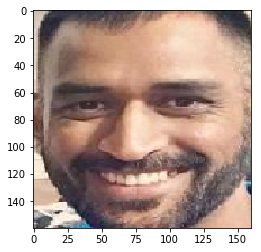

In [0]:
plt.imshow(group_list[2]["identity"])

In [0]:
get_cosine_distance(all_faces[0]["face_embeddings"][0],all_faces[2]["face_embeddings"][1])

0.81841093

In [0]:
get_distance(all_faces[2]["face_embeddings"][1],all_faces[0]["face_embeddings"][0])

6.9300036

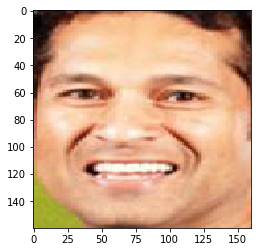

In [0]:
plt.imshow(all_faces[2]["face_list"][1])

In [0]:
from numpy import dot
from numpy.linalg import norm

def get_cosine_distance(a,b):
  return dot(a, b)/(norm(a)*norm(b))

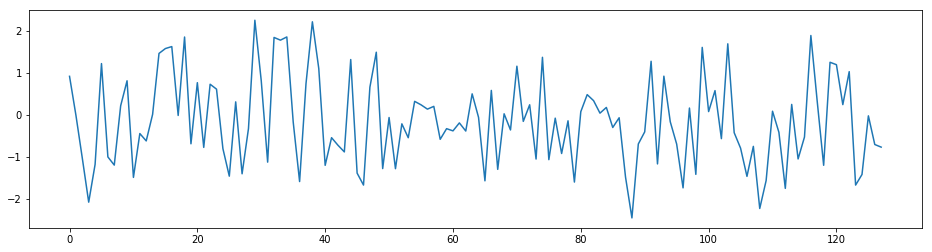

In [0]:

plt.figure(figsize=(16,4))
plt.plot(all_faces[7]["face_embeddings"][1])

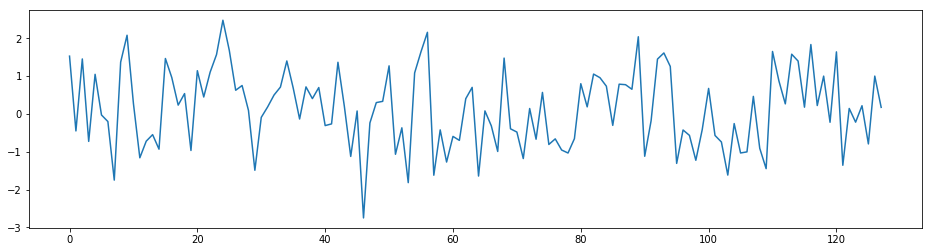

In [0]:

plt.figure(figsize=(16,4))
plt.plot(all_faces[6]["face_embeddings"][2])

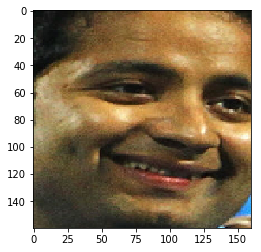

In [0]:
group_list

[{'center': array([-0.11821762, -0.9649142 ,  2.6072054 ,  1.1274604 , -0.62224203,
         -0.56045717, -0.33174786, -1.858653  ,  2.1076975 , -2.0412242 ,
          1.8254128 , -1.6112406 ,  0.9081333 , -0.7111145 , -0.65103936,
          0.3292064 ,  0.3370257 ,  1.4087079 , -0.7505644 ,  0.16677293,
          0.767938  ,  1.0361997 ,  1.568205  ,  1.0739142 ,  2.0603125 ,
         -1.6311604 , -0.5977106 , -0.07634635,  1.8015963 ,  0.14223987,
         -0.51115   , -0.8698362 , -1.0399266 ,  1.2317543 ,  0.37201557,
         -0.47662526, -0.9327837 ,  0.4490332 , -0.9807945 ,  0.78333557,
          0.93633723, -1.4227815 ,  1.5269026 ,  0.33672252,  0.44873622,
          0.5749054 ,  0.27307698, -1.5178801 ,  1.614015  ,  1.2478321 ,
          0.50816363, -1.4034039 , -0.00555756, -1.0093524 , -0.7128569 ,
         -0.00456637,  0.01829229, -1.7037278 , -0.67039675,  1.6527561 ,
          1.054449  , -0.55911887,  0.5534683 , -1.4971555 , -0.7227722 ,
          1.1342933 ,  0.596

# Summarizing the results from the similarity approach

In [0]:
def show_all_faces(all_faces):
  i=0
  _ ,fig = plt.subplots(1, len(all_faces), figsize=(12,12))
  if len(all_faces)==1:
      plt.imshow(all_faces[0])
      print("###############################")
      return None
  else:
      fig = fig.flatten()
      for f in fig:
        f.imshow(all_faces[i])
        i=i+1
      plt.show()
  print("###############################")

In [0]:
# group_list[6]["images"]

In [0]:
# len(group_list)

for i in group_list:
  print(i["images"])
  print("#####")

['/content/drive/My Drive/face grouping/data/Yuvraj-Singh-and-MS-Dhoni.jpg', '/content/drive/My Drive/face grouping/data/virat-dhoni.jpg', '/content/drive/My Drive/face grouping/data/707838-sachin-tendulkar-ms-dhoni.jpg', '/content/drive/My Drive/face grouping/data/suresh_Raina_dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/Yuvraj-Singh-and-MS-Dhoni.jpg', '/content/drive/My Drive/face grouping/data/r.jpeg']
#####
['/content/drive/My Drive/face grouping/data/sachin_tendulkar_virat_kohli_1506238594.jpg', '/content/drive/My Drive/face grouping/data/virat-dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/sachin_tendulkar_virat_kohli_1506238594.jpg', '/content/drive/My Drive/face grouping/data/707838-sachin-tendulkar-ms-dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/virat-dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/suresh_Raina_dhoni.jpg']
#####
['/content/drive/My Drive/face grouping/data/r.jpeg']
#####


########################


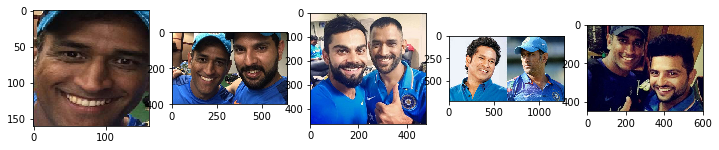

###############################
########################


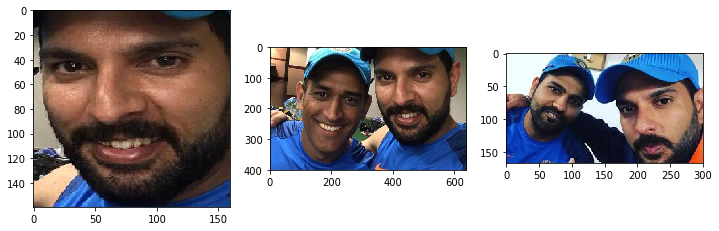

###############################
########################


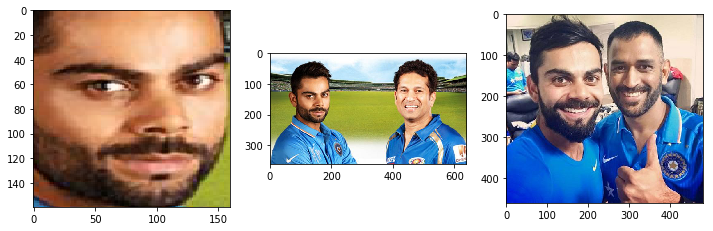

###############################
########################


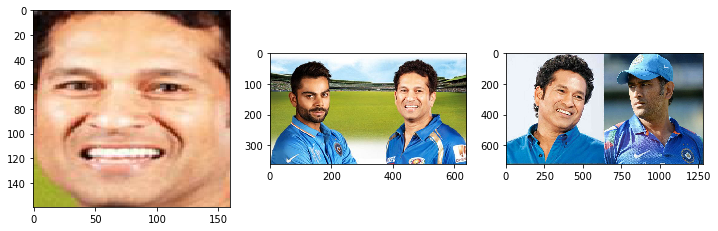

###############################
########################


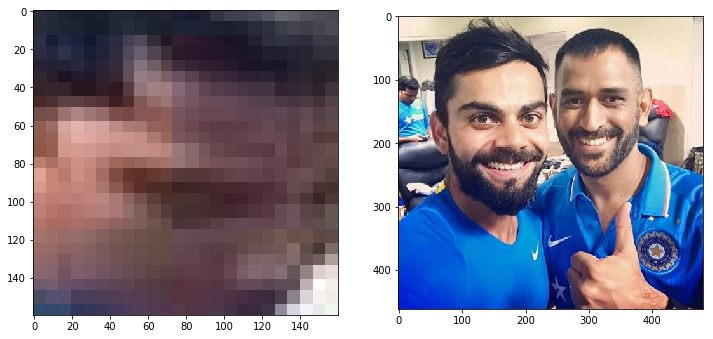

###############################
########################


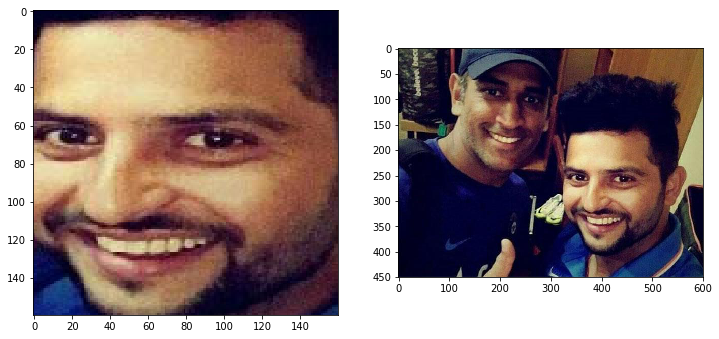

###############################
########################


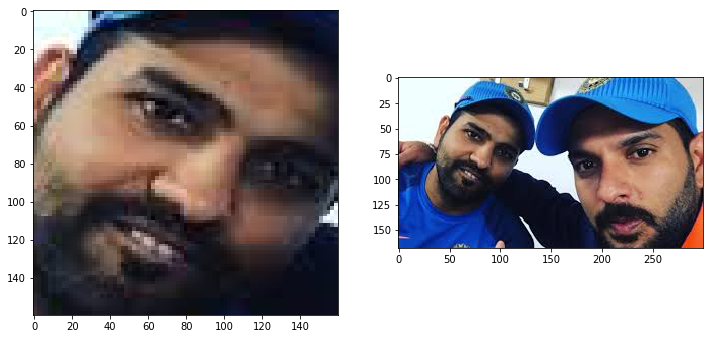

###############################


In [0]:
array=[]
i=0
for i in range(len(group_list)):
  array=[]
  array.append(group_list[i]["identity"])
#   plt.imshow(group_list[i]["identity"])
  for j in range(len(group_list[i]["images"])):
    image=Image.open(group_list[i]["images"][j])
    image=image.convert("RGB")
    image=np.array(image)
    array.append(image)
  array = np.array(array)
  print("########################")
  show_all_faces(array)
 



# Grouping photos Grouping using Clustering approach(under construction xD)

In [0]:
all_faces=load_data("/content/drive/My Drive/face grouping/Data")

100%|██████████| 10/10 [00:23<00:00,  2.17s/it]


In [0]:
embedding_list=[]
for i in range(len(all_faces)):
  if len(all_faces[i]["face_embeddings"])>0:
    embedding_list.append(all_faces[i]["face_embeddings"])
  else:
    embedding_list.append([])

In [0]:
for i in range(len(embedding_list)):
  print(len(embedding_list[i]))

2
9
12
14
10
2
7
5
1
0


In [0]:
# Testing for boss